# **Lab: Model Deployment**



## Exercise 1: Sklearn Pipeline

In this exercise, we will build a pipeline for transforming input data and build a Gaussian Mixture Model. We will be woking on the Mall Customer dataset:
https://raw.githubusercontent.com/AGilarde12/Mall-Customer-Segmentation/master/Data/Mall_Customers.csv

The steps are:
1.   Setup Repository
2.   Load and Explore Dataset
3.   Prepare Data
4.   Gaussian Mixture Model
5.   Build Pipeline
6.   Push Changes


### 1. Setup Repository

**[1.1]** Go to a folder of your choice on your computer (where you store projects)

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Go to a folder of your choice on your computer (where you store projects)

In [ ]:
#Solution:
cd ~/Projects/adv_dsi

**[1.2]** Copy the cookiecutter data science template

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Copy the cookiecutter data science template

In [ ]:
#Solution:
cookiecutter -c v1 https://github.com/drivendata/cookiecutter-data-science

Follow the prompt (name the project and repo adv_dsi_lab_4)

**[1.3]** Go inside the created folder `adv_dsi_lab_4`


In [ ]:
# Placeholder for student's code (1 command line)
# Task: Go inside the created folder adv_dsi_lab_4

In [ ]:
#Solution:
cd adv_dsi_lab_4

**[1.4]** Create a file called `Dockerfile` and add the following content:

`FROM jupyter/scipy-notebook:0ce64578df46`

`RUN conda install yellowbrick`

`RUN pip install mlflow==1.13`

`RUN pip install psycopg2-binary==2.8.5`

`ENV PYTHONPATH "${PYTHONPATH}:/home/jovyan/work"`

`RUN echo "export PYTHONPATH=/home/jovyan/work" >> ~/.bashrc`

`WORKDIR /home/jovyan/work`


In [ ]:
# Placeholder for student's code (1 command line)
# Task: Create a file called Dockerfile 

In [ ]:
#Solution:
vi Dockerfile

We will create our own Docker image based on the official jupyter/scipy-notebook.

**[1.5]** Build the image from this Dockerfile

In [ ]:
docker build -t gmm-notebook:latest .

Syntax: docker build [OPTIONS] PATH 

Options:

`-t: Name and optionally a tag in the 'name:tag' format`

Documentation: https://docs.docker.com/engine/reference/commandline/build/

**[1.6]** Run the built image

In [ ]:
docker run  -dit --rm --name adv_dsi_lab_4 -p 8888:8888 -e JUPYTER_ENABLE_LAB=yes -v ~/Projects/adv_dsi/adv_dsi_lab_4:/home/jovyan/work -v ~/Projects/adv_dsi/src:/home/jovyan/work/src gmm-notebook:latest 

**[1.7]** Display last 50 lines of logs

In [ ]:
docker logs --tail 50 adv_dsi_lab_4

Copy the url displayed and paste it to a browser in order to launch Jupyter Lab

**[1.8]** Initialise the repo

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Initialise the repo

In [ ]:
#Solution:
git init

**[1.9]** Login into Github with your account (https://github.com/) and create a public repo with the name `adv_dsi_lab_4`

**[1.10]** In your local repo `adv_dsi_lab_4`, link it with Github (replace the url with your username)

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Link repo with Github

In [ ]:
#Solution:
git remote add origin git@github.com:<username>/adv_dsi_lab_1_4

**[1.11]** Add you changes to git staging area and commit them

In [ ]:
# Placeholder for student's code (2 command lines)
# Task: Add you changes to git staging area and commit them

In [ ]:
#Solution:
git add .
git commit -m "init"

**[1.12]** Push your master branch to origin

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Push your master branch to origin

In [ ]:
#Solution:
git push --set-upstream origin master

**[1.13]** Preventing push to `master` branch

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Preventing push to master branch

In [ ]:
# Solution
git config branch.master.pushRemote no_push

**[1.14]** Create a new git branch called `gmm_pipeline`

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Create a new git branch called gmm_pipeline

In [ ]:
#Solution:
git checkout -b gmm_pipeline

**[1.15]** Navigate the folder `notebooks` and create a new jupyter notebook called `1_gmm_pipeline.ipynb`

### 2.   Load and Explore Dataset

**[2.1]** Import the pandas and numpy packages

In [ ]:
# Placeholder for student's code (3 lines of Python code)
# Task: mport the pandas and numpy packages

In [1]:
#Solution
import pandas as pd
import numpy as np

**[2.4]** Create a variable called `file_url` containing th url to the raw dataset

In [2]:
# Placeholder for student's code (1 line of Python code)
# Task: Create a variable called file_url containing th url to the raw dataset

In [3]:
#Solution
file_url = 'https://raw.githubusercontent.com/AGilarde12/Mall-Customer-Segmentation/master/Data/Mall_Customers.csv'

**[2.5]** Load the data in a dataframe called `df`


In [4]:
# Placeholder for student's code (1 line of Python code)
# Task: Load the data in a dataframe called df

In [5]:
#Solution:
df = pd.read_csv(file_url)

**[2.6]** Display the first 5 rows of df

In [6]:
# Placeholder for student's code (1 line of Python code)
# Task: Display the first 5 rows of df

In [7]:
# Solution
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**[2.7]** Display the dimensions (shape) of df

In [8]:
# Placeholder for student's code (1 line of Python code)
# Task: Task: Display the dimensions (shape) of df

In [9]:
# Solution
df.shape

(200, 5)

**[2.8]** Display the summary (info) of df

In [10]:
# Placeholder for student's code (1 line of Python code)
# Task: Display the summary (info) of df

In [11]:
# Solution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**[2.9]** Display the descriptive statistics of df


In [12]:
# Placeholder for student's code (1 line of Python code)
# Task: Display the descriptive statictics of df

In [13]:
# Solution
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**[2.10]** Save the dataframe locally in the `data/raw` folder

In [14]:
# Placeholder for student's code (1 line of Python code)
# Save the dataframe locally in the data/raw folder

In [15]:
# Solution
df.to_csv('../data/raw/Mall_Customers.csv', index=False)

### 3. Prepare Data

**[3.1]** Create a copy of `df` and save it into a variable called `df_cleaned`

In [16]:
# Placeholder for student's code (1 line of Python code)
# Task: Create a copy of df and save it into a variable called df_cleaned

In [17]:
# Solution
df_cleaned = df.copy()

**[3.2]** Drop the column `CustomerID` from the dataframe and save it into the `data/interim` folder

In [18]:
# Placeholder for student's code (1 line of Python code)
# Task: Drop the column CustomerID from the dataframe and save it into the data/interim folder

In [19]:
# Solution
df_cleaned.drop('CustomerID', axis=1, inplace=True)
df_cleaned.to_csv('../data/interim/Mall_Customers.csv', index=False)

**[3.3]** Import `train_test_split` from `sklearn.model_selection`

In [20]:
# Placeholder for student's code (1 line of Python code)
# Task: Import train_test_split from sklearn.model_selection

In [21]:
# Solution
from sklearn.model_selection import train_test_split

**[3.4]** Split the data into training and testing sets with 80-20 ratio

In [22]:
# Placeholder for student's code (1 line of Python code)
# Task: Split the data into training and testing sets with 80-20 ratio

In [23]:
# Solution
X_train, X_test = train_test_split(df_cleaned, test_size=0.2, random_state=8)

**[3.5]** Create a copy of `X_train` and save it into a variable called `X_train_cleaned`

In [24]:
# Placeholder for student's code (1 line of Python code)
# Task: Create a copy of X_train and save it into a variable called X_train_cleaned

In [25]:
# Solution
X_train_cleaned = X_train.copy()

**[3.6]** Import `StandardScaler` and `OneHotEncoder` from `sklearn.preprocessing`

In [26]:
# Placeholder for student's code (1 line of Python code)
# Task: Import StandardScaler and OneHotEncoder from sklearn.preprocessing

In [27]:
# Solution
from sklearn.preprocessing import StandardScaler, OneHotEncoder

**[3.7]** Create a list called `num_cols` that contains `Age`, `Annual Income (k$)` and `Spending Score (1-100)`

In [28]:
# Placeholder for student's code (1 line of Python code)
# Task: Create a list called num_cols that contains Age, Annual Income (k$) and Spending Score (1-100)

In [29]:
# Solution
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

**[3.8]** Instantiate a `StandardScaler` and called it `sc`

In [30]:
# Placeholder for student's code (1 line of Python code)
# Task: Instantiate a StandardScaler and called it sc

In [31]:
# Solution
sc = StandardScaler()

**[3.9]** Fit and transform the numeric feature of `X_train_cleaned` and replace the data into it

In [32]:
# Placeholder for student's code (1 line of Python code)
# Task: Fit and transform the numeric feature of X_train_cleaned and replace the data into it

In [33]:
# Solution
X_train_cleaned[num_cols] = sc.fit_transform(X_train_cleaned[num_cols])

**[3.10]** Create a list called `cat_cols` that contains `Gender`

In [34]:
# Placeholder for student's code (1 line of Python code)
# Task: Create a list called cat_cols that contains Gender

In [35]:
# Solution
cat_cols = ['Gender']

**[3.11]** Instantiate a `OneHotEncoder` with `sparse=False` and `drop='first'` and save it to a variable called `ohe`

In [36]:
# Placeholder for student's code (1 line of Python code)
# Task: Instantiate a OneHotEncoder with sparse=False and drop='first' and save it to a variable called ohe

In [37]:
# Solution
ohe = OneHotEncoder(sparse=False, drop='first')

**[3.12]** Fit and transform the categorical feature of `X_train_cleaned` and replace the data into it

In [38]:
# Placeholder for student's code (1 line of Python code)
# Task: Fit and transform the categorical feature of `X_train_cleaned` and replace the data into it

In [39]:
# Solution
X_train_cleaned[cat_cols] = ohe.fit_transform(X_train_cleaned[cat_cols])

**[3.13]** Reset the indexes of `X_train_cleaned`

In [40]:
# Placeholder for student's code (1 line of Python code)
# Task: Reset the indexes of X_train_cleaned

In [41]:
# Solution
X_train_cleaned.reset_index(drop=True, inplace=True)

### 4. Gaussian Mixture Model

**[4.1]** Import `KElbowVisualizer` from `yellowbrick.cluster`
`KMeans` from `sklearn.cluster`

In [42]:
# Placeholder for student's code (2 lines of Python code)
# Task: Import KElbowVisualizer from yellowbrick.cluster KMeans from sklearn.cluster

In [43]:
# Solution
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

**[4.2]** Instantiate a `KElbowVisualizer` with an instantied KMeans and k=(2, 15) and save it into a variable called `model`

In [44]:
# Placeholder for student's code (1 line of Python code)
# Task: Instantiate a KElbowVisualizer with an instantied KMeans and k=(2, 15) and save it into a variable called model

In [45]:
# Solution
model = KElbowVisualizer(KMeans(), k=(2,15))

**[4.3]** Fit `model` with `X_train_cleaned`

In [46]:
# Placeholder for student's code (1 line of Python code)
# Task: Fit model with X_train_cleaned

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f549a823950>,
                 estimator=KMeans(algorithm='auto', copy_x=True,
                                  init='k-means++', max_iter=300, n_clusters=14,
                                  n_init=10, n_jobs=None,
                                  precompute_distances='auto',
                                  random_state=None, tol=0.0001, verbose=0),
                 k=None, locate_elbow=True, metric='distortion', timings=True)

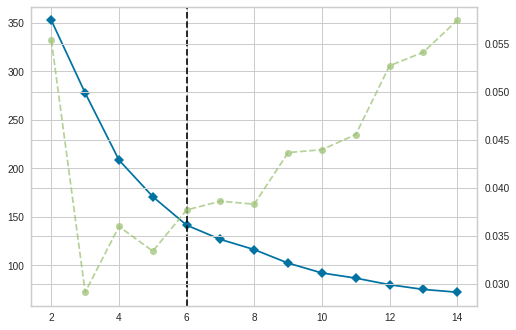

In [47]:
# Solution
model.fit(X_train_cleaned)

**[4.4]** Save the attribute `elbow_value_` from `model` and save it to a variable called `n_clusters`

In [48]:
# Placeholder for student's code (1 line of Python code)
# Task: Save the attribute elbow_value_ from model and save it to a variable called n_clusters

In [49]:
# Solution
n_clusters = model.elbow_value_

**[4.5]** Import `GaussianMixture` from `sklearn.mixture`

In [50]:
# Placeholder for student's code (1 line of Python code)
# Task: Import GaussianMixture from sklearn.mixture

In [51]:
# Solution
from sklearn.mixture import GaussianMixture

**[4.6]** Instantiate a `GaussianMixture` with `n_components` and `random_state` set and save it into a variable called `gmm`

In [52]:
# Placeholder for student's code (1 line of Python code)
# Task: Instantiate a GaussianMixture with n_components and random_state set and save it into a variable called gmm

In [53]:
# Solution
gmm = GaussianMixture(n_components=n_clusters, random_state=8)

**[4.7]** Fit `gmm` with `X_train_cleaned`

In [54]:
# Placeholder for student's code (1 line of Python code)
# Task: Fit gmm with X_train_cleaned

In [55]:
# Solution
gmm.fit(X_train_cleaned)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=8, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

**[4.8]** Make predictions on `X_train_cleaned`

In [56]:
# Placeholder for student's code (1 line of Python code)
# Task: Make predictions on X_train_cleaned

In [57]:
# Solution
gmm.predict(X_train_cleaned)

array([2, 2, 5, 4, 1, 3, 1, 4, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 4,
       0, 5, 1, 0, 4, 4, 0, 5, 1, 1, 4, 3, 3, 4, 0, 2, 4, 0, 2, 2, 1, 0,
       0, 5, 3, 0, 5, 3, 2, 0, 0, 4, 4, 5, 1, 3, 1, 0, 5, 0, 0, 1, 3, 4,
       4, 1, 1, 3, 5, 2, 2, 5, 4, 5, 5, 5, 5, 0, 0, 0, 0, 4, 0, 2, 1, 5,
       5, 3, 0, 3, 0, 4, 5, 1, 0, 0, 0, 2, 5, 3, 5, 5, 4, 1, 2, 2, 1, 0,
       5, 4, 2, 3, 2, 3, 0, 0, 4, 3, 0, 0, 1, 5, 5, 0, 5, 1, 1, 0, 0, 4,
       3, 1, 0, 2, 2, 0, 0, 0, 1, 4, 1, 3, 0, 1, 4, 1, 0, 0, 0, 4, 1, 0,
       0, 5, 1, 4, 4, 1])

**[4.9]** Transform the first observation of `X_train_cleaned` into a dataframe and call it `obs` 

In [58]:
# Placeholder for student's code (1 line of Python code)
# Task: Transform the first observation of X_train_cleaned into a dataframe and call it obs

In [59]:
# Solution
obs = pd.DataFrame(X_train_cleaned.iloc[0]).transpose()

**[4.10]** Make prediction on `obs`

In [60]:
# Placeholder for student's code (1 line of Python code)
# Task: Make prediction on obs

In [61]:
# Solution
gmm.predict(obs)

array([2])

### 5. Build Pipeline

**[5.1]** Import `Pipeline` from `sklearn.pipeline`

In [62]:
# Placeholder for student's code (1 line of Python code)
# Task: Import Pipeline from sklearn.pipeline

In [63]:
# Solution:
from sklearn.pipeline import Pipeline

**[5.2]** Create a `Pipeline` called `num_transformer` with one step that contains `StandardScaler`

In [64]:
# Placeholder for student's code (multiple lines of Python code)
# Task: Create a Pipeline called num_transformer with one step that contains StandardScaler

In [65]:
# Solution:
num_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

**[5.3]** Create a `Pipeline` called `cat_transformer` with one step that contains `OneHotEncoder`

In [66]:
# Placeholder for student's code (multiple lines of Python code)
# Task: Create a Pipeline called cat_transformer with one step that contains OneHotEncoder

In [67]:
# Solution:
cat_transformer = Pipeline(
    steps=[
        ('one_hot_encoder', OneHotEncoder(sparse=False, drop='first'))
    ]
)

**[5.4]** Import `ColumnTransformer` from `sklearn.compose`

In [68]:
# Placeholder for student's code (1 line of Python code)
# Task: Import ColumnTransformer from sklearn.compose

In [69]:
# Solution:
from sklearn.compose import ColumnTransformer

**[5.5]** Create a `ColumnTransformer` called `preprocessor` with 2 steps containing `num_transformer` and `cat_transformer` that will be applied respectively to `num_cols` and `cat_cols`

In [70]:
# Placeholder for student's code (multiple lines of Python code)
# Task: Create a ColumnTransformer called preprocessor with 2 steps containing num_transformer and cat_transformer that will be applied respectively to num_cols and cat_cols

In [71]:
# Solution:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_cols', num_transformer, num_cols),
        ('cat_cols', cat_transformer, cat_cols)
    ]
)

**[5.6]** Create a `Pipeline` called `gm_pipe` that contains 2 steps `preprocessor` and another that instantiate a GaussianMixture with same parameters as previously

In [72]:
# Placeholder for student's code (multiple lines of Python code)
# Task: Create a Pipeline called gm_pipe that contains 2 steps preprocessor and another that instantiate a GaussianMixture with same parameters as previously

In [73]:
# Solution:
gmm_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clustering', GaussianMixture(n_components=6, random_state=8))
    ]
)

**[5.7]** Fit `gmm_pipe` with `X_train`

In [74]:
# Placeholder for student's code (1 line of Python code)
# Task: Fit gmm_pipe with X_train

In [75]:
# Solution:
gmm_pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_cols',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                         

**[5.8]** Make predictions on X_train

In [76]:
# Placeholder for student's code (1 line of Python code)
# Task: Make predictions on X_train

In [77]:
# Solution:
gmm_pipe.predict(X_train)

array([2, 2, 5, 4, 1, 3, 1, 4, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 4,
       0, 5, 1, 0, 4, 4, 0, 5, 1, 1, 4, 3, 3, 4, 0, 2, 4, 0, 2, 2, 1, 0,
       0, 5, 3, 0, 5, 3, 2, 0, 0, 4, 4, 5, 1, 3, 1, 0, 5, 0, 0, 1, 3, 4,
       4, 1, 1, 3, 5, 2, 2, 5, 4, 5, 5, 5, 5, 0, 0, 0, 0, 4, 0, 2, 1, 5,
       5, 3, 0, 3, 0, 4, 5, 1, 0, 0, 0, 2, 5, 3, 5, 5, 4, 1, 2, 2, 1, 0,
       5, 4, 2, 3, 2, 3, 0, 0, 4, 3, 0, 0, 1, 5, 5, 0, 5, 1, 1, 0, 0, 4,
       3, 1, 0, 2, 2, 0, 0, 0, 1, 4, 1, 3, 0, 1, 4, 1, 0, 0, 0, 4, 1, 0,
       0, 5, 1, 4, 4, 1])

**[5.9]** Transform the first observation of `X_train` into a dataframe, call it `obs` and make prediction on it

In [78]:
# Placeholder for student's code (2 lines of Python code)
# Task: Transform the first observation of X_train into a dataframe, call it obs and make prediction on it

In [79]:
# Solution:
obs = pd.DataFrame(X_train.iloc[0]).transpose()
gmm_pipe.predict(obs)

array([2])

**[5.10]** Import `dump` from `joblib` package and save `gmm_pipe` into `models` folder

In [80]:
# Placeholder for student's code (2 lines of Python code)
# Task: Import dump from joblib package and save gmm_pipe into models folder

In [81]:
# Solution:
from joblib import dump 

dump(gmm_pipe,  '../models/gmm_pipeline.joblib')

['../models/gmm_pipeline.joblib']

### 6.   Push changes

**[6.1]** Add you changes to git staging area

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Add you changes to git staging area

In [ ]:
# Solution:
git add .

**[6.2]** Create the snapshot of your repository and add a description

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Create the snapshot of your repository and add a description

In [ ]:
# Solution:
git commit -m "gmm pipeline"

**[6.3]** Push your snapshot to Github

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Push your snapshot to Github

In [ ]:
# Solution:
git push

**[6.4]** Check out to the master branch

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Check out to the master branch

In [ ]:
# Solution:
git checkout master

**[6.5]** Pull the latest updates

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Pull the latest updates

In [ ]:
git pull

**[6.6]** Check out to the `gmm_pipeline`

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Check out to the gmm_pipeline

In [ ]:
# Solution:
git checkout gmm_pipeline

**[6.7]** Merge the `master` branch and push your changes


In [ ]:
# Placeholder for student's code (2 command lines)
# Task: Merge the master branch and push your changes

In [ ]:
# Solution:
git merge master
git push

**[6.8]** Go to Github and merge the branch after reviewing the code and fixing any conflict




**[6.9]** Stop the Docker container

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Stop the Docker container

In [ ]:
# Solution:
docker stop adv_dsi_lab_4